<center> <font color='green'> 

# World Happiness Analysis: Clustering Analysis 

</font> </center>

<font color='orange'> 

## Table of Contents 
01. Import Libraries & Data
02. Data Preparation
03. The Elbow Technique
04. Clustring Analysis
05. Export Data 

</font>

## 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
path = r'C:\Users\thang\Desktop\Data Analytics\Data Analytics Immersion\Final Project\World Happiness Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '2. Data', 'Edited', 'World_Happiness_Data_Viz.pkl'))

In [4]:
df.head()

,Country,Happiness Rank,Happiness Score,GDP,Life Expectancy,Freedom,Generosity,Corruption,Year,GDP_Category
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2015,High GDP
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2015,High GDP
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2015,High GDP
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2015,High GDP
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2015,High GDP


In [5]:
df.shape

(781, 10)

## 2. Data Preparation

In [12]:
# Remove any categorical columns
df_prep = df.drop(columns = ['Country','Happiness Rank','Year','GDP_Category'])

In [13]:
df_prep.head()

,Happiness Score,GDP,Life Expectancy,Freedom,Generosity,Corruption
0,7.587,1.39651,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,0.90563,0.63297,0.45811,0.32957


## 3. The Elbow Technique

In [14]:
# Defines the range of potential clusters in the data.
num_cluster = range(1, 10) 

# Defines k-means clusters in the range assigned above.
k_means = [KMeans(n_clusters=i) for i in num_cluster] 

In [17]:
# Create a score that represents a rate of variation for the given cluster option.
score = [k_means[i].fit(df_prep).score(df_prep) for i in range(len(k_means))] 
score

c:\Users\thang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-1205.8270340400416,
 -431.3393028808121,
 -253.28531153783393,
 -185.74362910171763,
 -146.32722513491203,
 -129.0139599572022,
 -115.16668631003208,
 -105.63800290725557,
 -98.66813533951179]

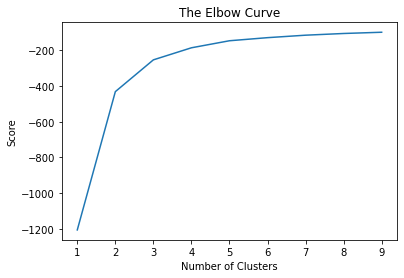

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cluster,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('The Elbow Curve')
pl.show()

<font color='red'> The graph shows a large jump from two to three on the x-axis before the curve straightens out. This means that the optimal count for clusters is three. </font>

## 4. Clustering Analysis

In [21]:
# Create the k-means object.
k_means = KMeans(n_clusters = 3) 

In [23]:
# Fit the k-means object to the data.
k_means.fit(df_prep)

KMeans(n_clusters=3)

In [24]:
# Create a new column to identify which cluster each observation belongs to.
df_prep['Clusters'] = k_means.fit_predict(df_prep)

In [25]:
df_prep.head()

,Happiness Score,GDP,Life Expectancy,Freedom,Generosity,Corruption,Clusters
0,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2
1,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2
2,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2
3,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2
4,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2


In [26]:
df_prep['Clusters'].value_counts()

0    308
1    283
2    190
Name: Clusters, dtype: int64

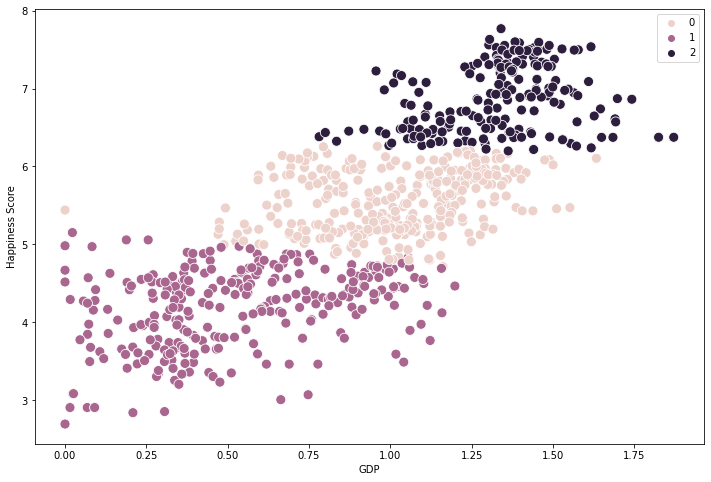

In [32]:
# Plot the clusters for the "GDP and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prep['GDP'], y=df_prep['Happiness Score'], hue=k_means.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') 
plt.ylabel('Happiness Score') 
plt.show()

<AxesSubplot:>

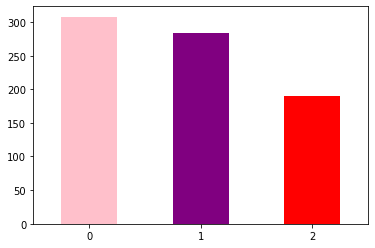

In [31]:
# Create a few different visualizations using the clustered data. 
df_prep['Clusters'].value_counts().plot.bar(color =['pink', 'purple','red'], rot = 1)

<font color='red'> The clusters are divided nicely based on Happiness Score and GDP. The cutoffs for Happiness Score seem to be 5 and 6.25 and GDP is divided in 0.5 increment with range of 1 for each cluster. 
For example, Cluster 1 includes countries that scored less than 5 in Happiness Score and their GDP score can range from 0 to 1. 
For cluster 0, Happiness Score ranges from 5 to 6.25 and GDP ranges from 0.5 to 1.5 (incremental increase of 0.5 from the previous cluster). 
For cluster 2, Happiness Score ranges from 6.25 and above while GDP ranges from 1 to 2.
</font>

In [28]:
# Calculate the descriptive statistics for the clusters.
df_prep.groupby('Clusters').agg({'Happiness Score':['mean', 'median'], 
                            'GDP':['mean', 'median'], 
                            'Life Expectancy':['mean', 'median'],
                            'Freedom':['mean', 'median'],
                            'Generosity':['mean', 'median']})

Happiness Score              GDP          Life Expectancy            \
                    mean median      mean   median            mean    median   
Clusters                                                                       
0               5.558240  5.547  1.018043  1.03046        0.690672  0.685818   
1               4.178763  4.292  0.524634  0.47600        0.377813  0.361000   
2               6.868895  6.865  1.327498  1.34314        0.834689  0.838177   

           Freedom           Generosity            
              mean    median       mean    median  
Clusters                                           
0         0.402511  0.418347   0.184149  0.172729  
1         0.337775  0.356000   0.220871  0.202900  
2         0.534871  0.552180   0.271137  0.262500

<font color='red'> These results provide additional information about the relationships between these variables. For example, Cluster 1 is less happy compared to cluster 0 but it's more generous although not as generous as the happiest Cluster 2 </font>

## 5. Export Data

In [33]:
df_prep.to_pickle(os.path.join(path, '2. Data', 'Edited', 'World_Happiness_Data_Cluster.pkl'))